## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import pandas as pd

import seaborn as sns

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
correlacao = boston.corr()
correlacao

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [8]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,74
O MSE da árvore com profundidade=8 é: 0,98


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [9]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.54798762e-05, 6.19195046e-05, 1.39318885e-04,
        3.86996904e-04, 1.25386997e-03, 1.54798762e-03, 1.54798762e-03,
        1.87306502e-03, 1.99793602e-03, 2.50773994e-03, 2.61609907e-03,
        3.48297214e-03, 3.61197110e-03, 4.04540764e-03, 4.47368421e-03,
        5.69917441e-03, 6.19453044e-03, 6.26315789e-03, 7.47456877e-03,
        7.84829721e-03, 8.29279080e-03, 8.91640867e-03, 1.03242174e-02,
        1.11764706e-02, 1.31368863e-02, 1.56088751e-02, 2.12139795e-02,
        2.31648607e-02, 2.38018576e-02, 2.57769424e-02, 2.60113519e-02,
        2.63183695e-02, 2.75550396e-02, 2.85716743e-02, 2.95876724e-02,
        2.99488695e-02, 3.18443167e-02, 3.34378225e-02, 3.94267755e-02,
        4.45820433e-02, 4.50784314e-02, 5.20575726e-02, 5.23685685e-02,
        5.66602167e-02, 5.68885449e-02, 5.89494324e-02, 5.96078431e-02,
        6.50371589e-02, 7.45206670e-02, 8.32654663e-02, 8.76341120e-02,
        9.11867905e-02, 1.02585139e-01, 1.13015480

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
train_scores = [mean_squared_error(y_true=y_train,
                                   y_pred=clf.predict(X_train)) for clf in clfs]

test_scores  = [mean_squared_error(y_true=y_test,
                                   y_pred=clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0, 0.5, 'Profundidade da árvore')

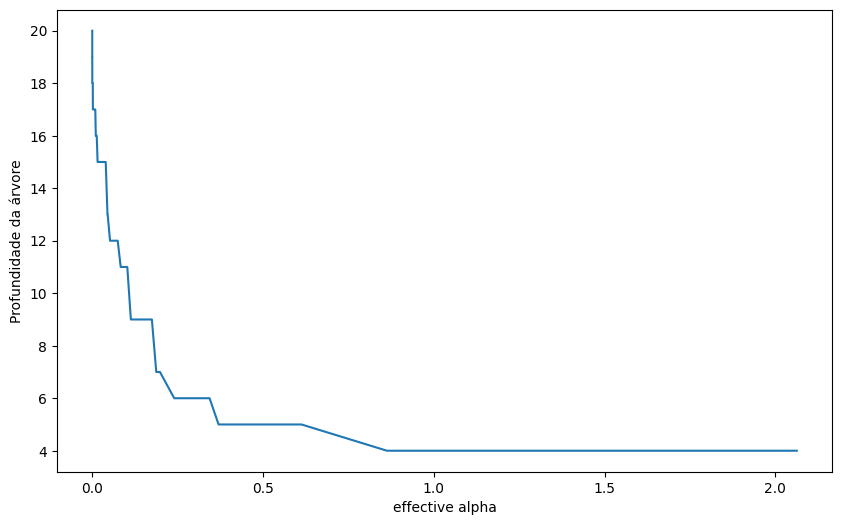

In [15]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-5], tree_depths[:-5])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [18]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas,
                            'train_scores':train_scores,
                            'test_scores':test_scores})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
83,2.062618,17.138896,17.268578
81,1.661211,13.080247,19.311302
82,1.996032,13.080247,19.311302
84,2.478259,19.617155,25.069406
85,3.832899,19.617155,25.069406
...,...,...,...
51,0.087634,2.523951,32.105970
52,0.091187,2.523951,32.105970
86,4.308448,27.758502,33.853134
87,15.546965,43.305467,49.211811


In [23]:
final_tree = DecisionTreeRegressor(ccp_alpha=.01, random_state=2402)
final_tree.fit(X_train, y_train)

print(f'Profundidade: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de testes: {final_tree.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundidade: 16
R-quadrado na base de testes: 0.56
MSE na base de testes: 32.49


### 7. Visualize esta árvore.

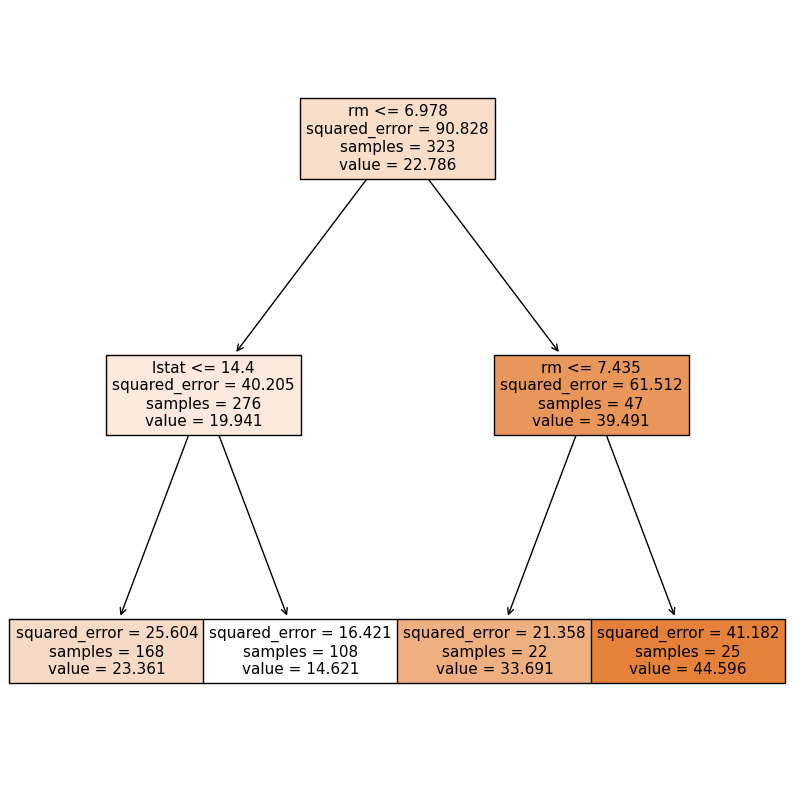

In [13]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)